### Get FRED Data by MSA

In [15]:
import pandas as pd
import numpy as np
import os
import requests
import json
import time
import matplotlib.pyplot as plt

Set up API Key

In [2]:
api_key = 'a37b50cd27afbc3ce23a81ddc5541dec'

Bring in List of Series

In [3]:
series = pd.read_csv('msa_series.csv')

In [4]:
keyword = 'Per Capita Personal Income'
reg_keyword = r'^Per Capita Personal Income'

In [5]:
income_series = series[series.title.str.match(reg_keyword)==True].reset_index(drop=True)

In [6]:
income_series.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes,state,msa
0,ANNI501PCPI,2021-12-04,2021-12-04,Per Capita Personal Income in Anniston-Oxford-...,1969-01-01,2020-01-01,Annual,A,Dollars,$,Not Seasonally Adjusted,NSA,2021-11-16 07:41:49-06,1.0,1.0,NaN,Alabama,"Anniston-Oxford, AL"
1,AUBU201PCPI,2021-12-04,2021-12-04,"Per Capita Personal Income in Auburn-Opelika, ...",1969-01-01,2020-01-01,Annual,A,Dollars,$,Not Seasonally Adjusted,NSA,2021-11-16 07:41:48-06,1.0,1.0,NaN,Alabama,"Auburn-Opelika, AL"
2,BIRM801PCPI,2021-12-04,2021-12-04,Per Capita Personal Income in Birmingham-Hoove...,1969-01-01,2020-01-01,Annual,A,Dollars,$,Not Seasonally Adjusted,NSA,2021-11-16 07:38:17-06,7.0,7.0,NaN,Alabama,"Birmingham-Hoover, AL"
3,COLU913PCPI,2021-12-04,2021-12-04,"Per Capita Personal Income in Columbus, GA-AL ...",1969-01-01,2020-01-01,Annual,A,Dollars,$,Not Seasonally Adjusted,NSA,2021-11-16 07:41:25-06,1.0,1.0,NaN,Alabama,"Columbus, GA-AL"
4,DFHF901PCPI,2021-12-04,2021-12-04,Per Capita Personal Income in Daphne-Fairhope-...,1969-01-01,2020-01-01,Annual,A,Dollars,$,Not Seasonally Adjusted,NSA,2021-11-16 07:41:23-06,1.0,1.0,NaN,Alabama,"Daphne-Fairhope-Foley, AL"


In [7]:
def get_series(series_id, api_key):
    
    params = {
        'api_key' : api_key,
        'series_id' : series_id,
        'file_type': 'json'
    }
    
    endpoint = 'https://api.stlouisfed.org/fred/series/observations'
    
    response = requests.get(endpoint, params=params)
    observations = pd.DataFrame(json.loads(response.text)['observations'])
    
    return observations
    

In [8]:
income_series.columns

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'group_popularity', 'notes', 'state',
       'msa'],
      dtype='object')

In [10]:
incomes = pd.DataFrame()
for idx in range(len(income_series)):
    series_df = get_series(income_series.id[idx], api_key)
    series_df['state'] = income_series.state[idx]
    series_df['msa'] = income_series.msa[idx]
    incomes = incomes.append(series_df)
    time.sleep(3)

(array([330.,   0.,   0.,   0.,   6.,  30.,   0.,   0.,   0.,   8.]),
 array([ 43. ,  54.3,  65.6,  76.9,  88.2,  99.5, 110.8, 122.1, 133.4,
        144.7, 156. ]),
 <BarContainer object of 10 artists>)

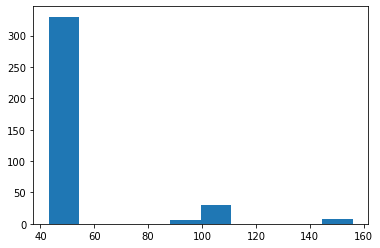

In [17]:
plt.hist(incomes.groupby(['msa'])['value'].count())

In [28]:
#incomes.query("state=='Alabama' & msa == 'Dallas-Fort Worth-Arlington, TX'")
incomes.query("state=='Pennsylvania' & msa == 'Youngstown-Warren-Boardman, OH-PA'")

,realtime_start,realtime_end,date,value,state,msa
0,2021-12-07,2021-12-07,1969-01-01,3771,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"
1,2021-12-07,2021-12-07,1970-01-01,3886,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"
2,2021-12-07,2021-12-07,1971-01-01,4111,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"
3,2021-12-07,2021-12-07,1972-01-01,4472,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"
4,2021-12-07,2021-12-07,1973-01-01,5143,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"
5,2021-12-07,2021-12-07,1974-01-01,5569,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"
6,2021-12-07,2021-12-07,1975-01-01,6005,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"
7,2021-12-07,2021-12-07,1976-01-01,6560,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"
8,2021-12-07,2021-12-07,1977-01-01,7252,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"
9,2021-12-07,2021-12-07,1978-01-01,7994,Pennsylvania,"Youngstown-Warren-Boardman, OH-PA"


In [26]:
incomes.groupby(['msa'])['value'].count()

msa
Abilene, TX                           52
Akron, OH                             52
Albany, GA                            52
Albany-Lebanon, OR                    52
Albany-Schenectady-Troy, NY           52
                                    ... 
Yakima, WA                            52
York-Hanover, PA                      52
Youngstown-Warren-Boardman, OH-PA    104
Yuba City, CA                         52
Yuma, AZ                              52
Name: value, Length: 374, dtype: int64